In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pickle
from sklearn.metrics import mean_squared_error

In [5]:
#data = pd.read_csv(r"E:\CDAC\Project\Pune.csv")
#from google.colab import drive
#drive.mount('/content/drive')
# Load the file from Google Drive
#data = pd.read_csv("/content/drive/MyDrive/Datasets - Colab/Pune.csv")
data=pd.read_csv('/kaggle/input/temp-data/Bengaluru.csv')

In [6]:
#checking columns
data.columns

Index(['Date', 'PS', 'PSC', 'T2M', 'T2MWET', 'T2MDEW', 'WS2M', 'WD2M', 'WD10M',
       'WS10M', 'QV2M', 'RH2M', 'PRECTOTCORR', 'Latitude', 'Longitude'],
      dtype='object')

In [7]:
#dropping unrequired features
data=data.drop(['T2MDEW', 'T2MWET', 'PS', 'PSC', 'WS2M', 'QV2M', 'RH2M', 'Latitude', 'Longitude', 'PRECTOTCORR', 'WD2M', 'WD10M', 'WS10M'], axis=1)
data.head()

,Date,T2M
0,2004010109,24.44
1,2004010114,29.13
2,2004010406,14.36
3,2004010408,19.39
4,2004010410,25.99


In [8]:
# convert the date column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%Y%m%d%H')
data.head()

,Date,T2M
0,2004-01-01 09:00:00,24.44
1,2004-01-01 14:00:00,29.13
2,2004-01-04 06:00:00,14.36
3,2004-01-04 08:00:00,19.39
4,2004-01-04 10:00:00,25.99


In [9]:
#changing index to date
data.index = data['Date']
data.head()

,Date,T2M
Date,,
2004-01-01 09:00:00,2004-01-01 09:00:00,24.44
2004-01-01 14:00:00,2004-01-01 14:00:00,29.13
2004-01-04 06:00:00,2004-01-04 06:00:00,14.36
2004-01-04 08:00:00,2004-01-04 08:00:00,19.39
2004-01-04 10:00:00,2004-01-04 10:00:00,25.99


In [10]:
data=data.sort_index()

In [11]:
data.head()

,Date,T2M
Date,,
2004-01-01 05:00:00,2004-01-01 05:00:00,16.26
2004-01-01 06:00:00,2004-01-01 06:00:00,16.56
2004-01-01 07:00:00,2004-01-01 07:00:00,18.64
2004-01-01 08:00:00,2004-01-01 08:00:00,21.66
2004-01-01 09:00:00,2004-01-01 09:00:00,24.44


In [12]:
#Renaming columns
data.rename(columns={'T2M': 'TEMP'}, inplace=True)

In [13]:
#checking for duplicated entried
data.duplicated().sum()

120

In [14]:
#dropping duplicate values
data=data.drop_duplicates()
data.duplicated().sum()

0

In [15]:
data.tail()

,Date,TEMP
Date,,
2024-02-19 00:00:00,2024-02-19 00:00:00,16.78
2024-02-19 01:00:00,2024-02-19 01:00:00,16.45
2024-02-19 02:00:00,2024-02-19 02:00:00,16.71
2024-02-19 03:00:00,2024-02-19 03:00:00,16.60
2024-02-19 04:00:00,2024-02-19 04:00:00,16.33


In [16]:
data=data[:-5]
data.tail()

,Date,TEMP
Date,,
2024-02-18 19:00:00,2024-02-18 19:00:00,21.39
2024-02-18 20:00:00,2024-02-18 20:00:00,20.26
2024-02-18 21:00:00,2024-02-18 21:00:00,19.26
2024-02-18 22:00:00,2024-02-18 22:00:00,18.23
2024-02-18 23:00:00,2024-02-18 23:00:00,17.40


In [17]:
data.count()

Date    176491
TEMP    176491
dtype: int64

In [18]:
# Splitting data into train and test sets
train_data = data[:8760]  # 1 year data
test_data = data[8760:8808]   # Use the last 48 hours for testing

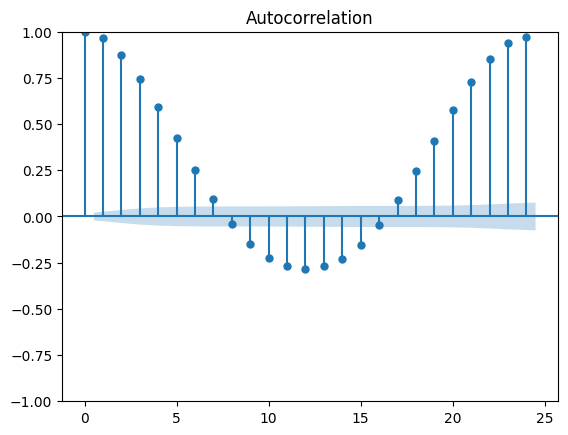

In [19]:
#plotting autocorrelation graph
plot_acf(train_data["TEMP"], lags=24, )
plt.show()

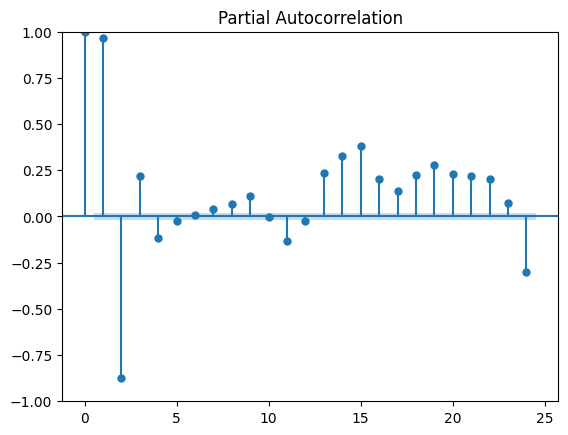

In [20]:
#plotting partial autocorrelation graph
plot_pacf(train_data["TEMP"], lags=24)
plt.show()

In [21]:
# SARIMA model parameters
order = (1, 1, 1)  # ARIMA parameters (p, d, q)
seasonal_order = (1, 1, 1, 24)  # SARIMA parameters (P, D, Q, S)

In [22]:
#to store RMSE after every year
rmse_record={}

In [23]:
# Fit SARIMA model
bengaluru_model = SARIMAX(train_data["TEMP"], order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False, dates=train_data["Date"])
bengaluru_result = bengaluru_model.fit()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.56836D-01    |proj g|=  5.74740D-01


 This problem is unconstrained.



At iterate    5    f=  1.38405D-01    |proj g|=  3.18397D-01

At iterate   10    f=  1.04196D-01    |proj g|=  1.29929D-02

At iterate   15    f=  1.04070D-01    |proj g|=  1.84841D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     23      1     0     0   2.264D-06   1.041D-01
  F =  0.10405471581265301     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


In [24]:
# Forecast temperatures for the next 48 hours
forecast = bengaluru_result.get_forecast(steps=48)

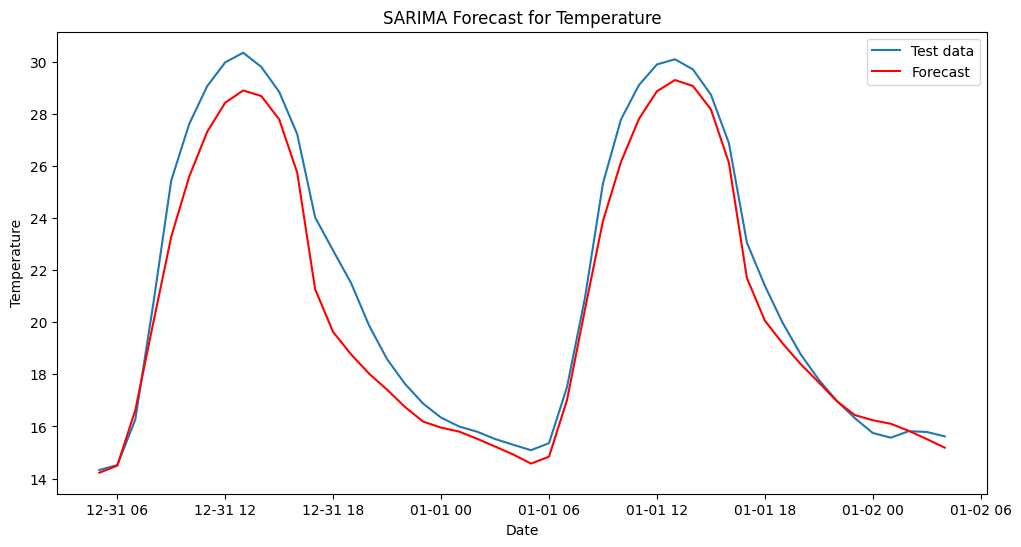

In [25]:
# Plot the predicted values along with the actual values
plt.figure(figsize=(12, 6))
#plt.plot(check.index, check["TEMP"], label='Train data')
plt.plot(test_data.index, test_data["TEMP"], label='Test data')
plt.plot(forecast.predicted_mean, label='Forecast', color='red')
#plt.plot(forecast.index, forecast.predicted_mean, label='Forecast', color='red')
#plt.fill_between(forecast.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.5)
plt.title('SARIMA Forecast for Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [26]:
rmse = np.sqrt(mean_squared_error(test_data["TEMP"], forecast.predicted_mean))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 1.1944454864495697


In [27]:
rmse_record[1]=rmse

In [28]:
#saving pickle file of model
#with open("/kaggle/working/agartala_model.pkl", 'wb') as f:
#    pickle.dump(agartala_result, f)

In [29]:
table=[8760*x for x in range(1, 21)]
#table

training now:  2


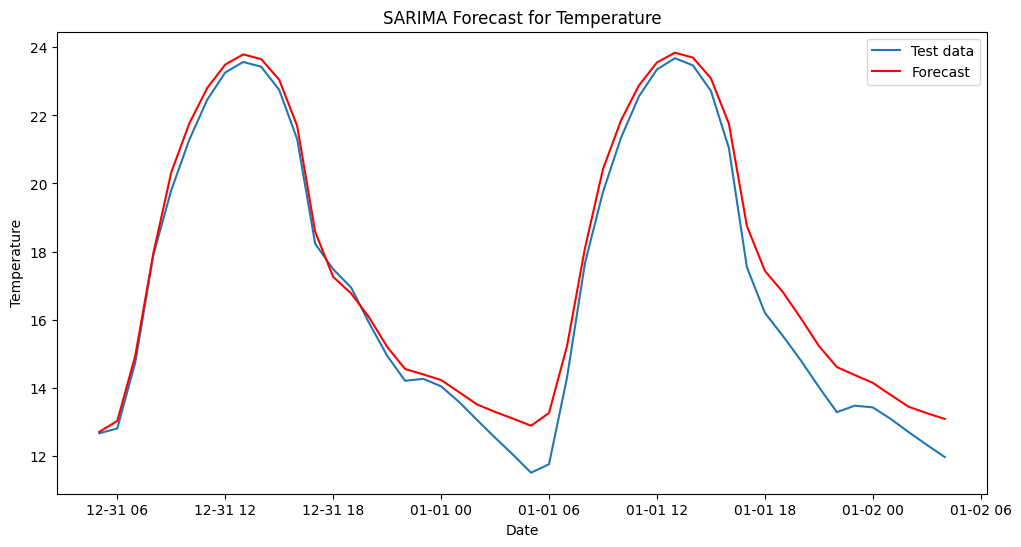

Root Mean Squared Error (RMSE): 0.7109212744375722
training now:  3


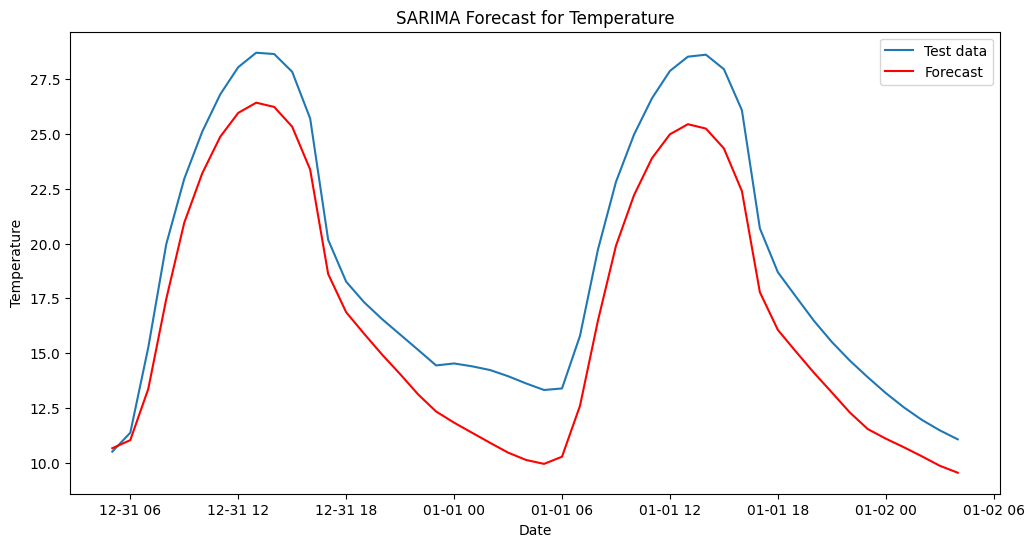

Root Mean Squared Error (RMSE): 2.505106744713138
training now:  4


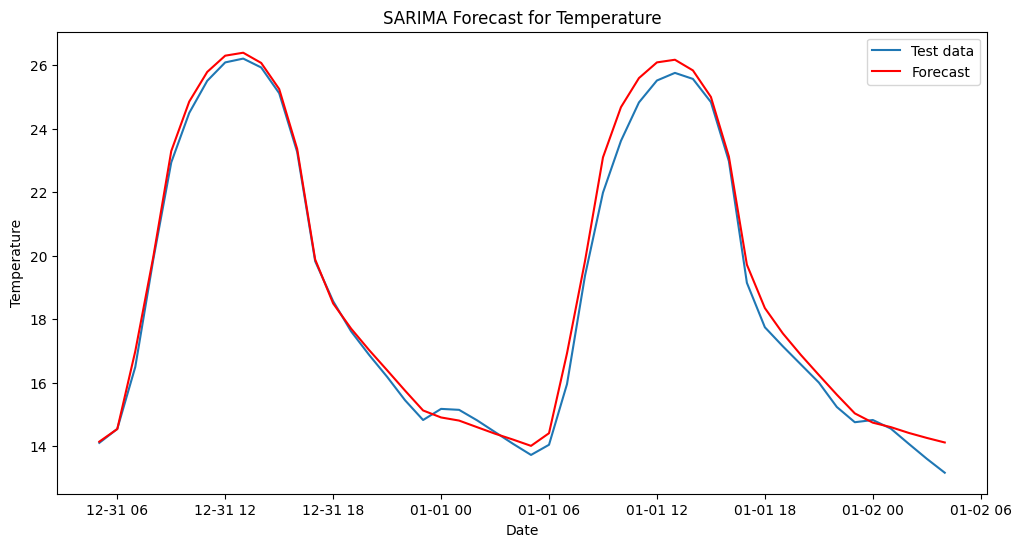

Root Mean Squared Error (RMSE): 0.4294606143411198
training now:  5


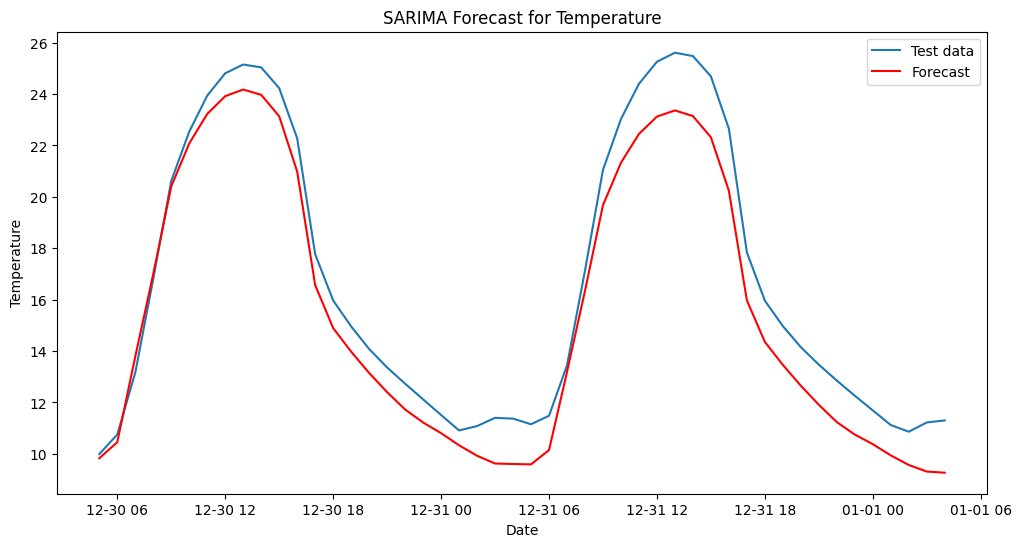

Root Mean Squared Error (RMSE): 1.3936402694133538
training now:  6


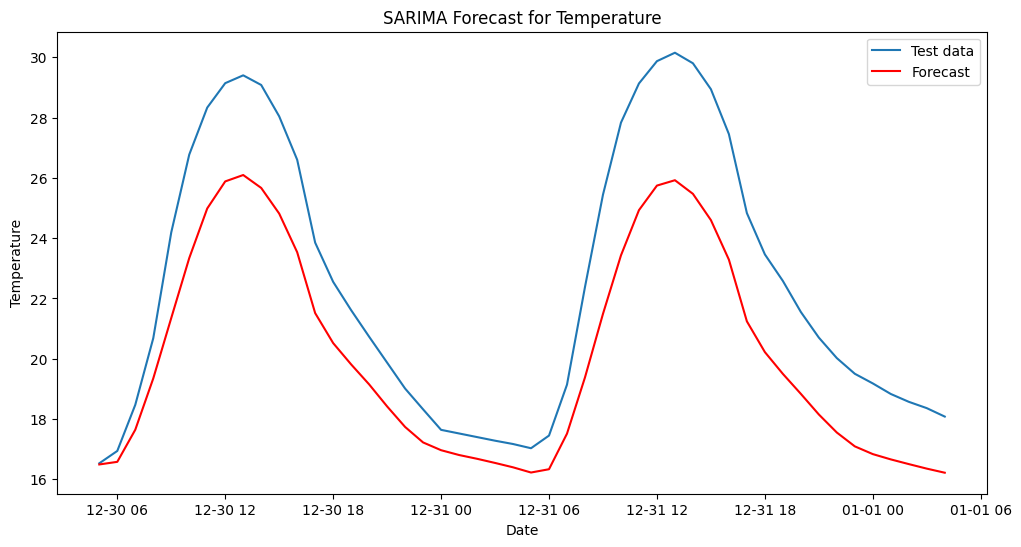

Root Mean Squared Error (RMSE): 2.6860261677668547
training now:  7


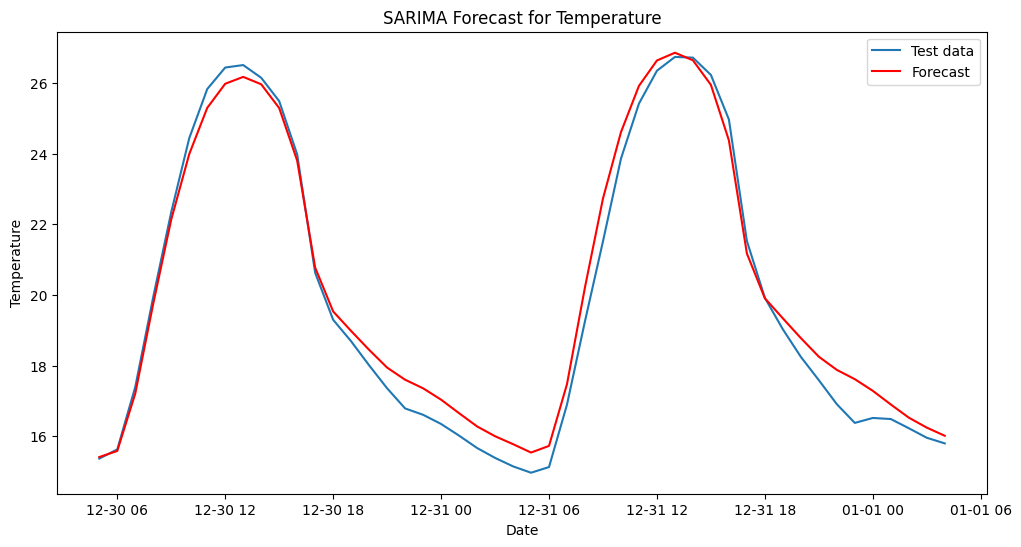

Root Mean Squared Error (RMSE): 0.54259205101153
training now:  8


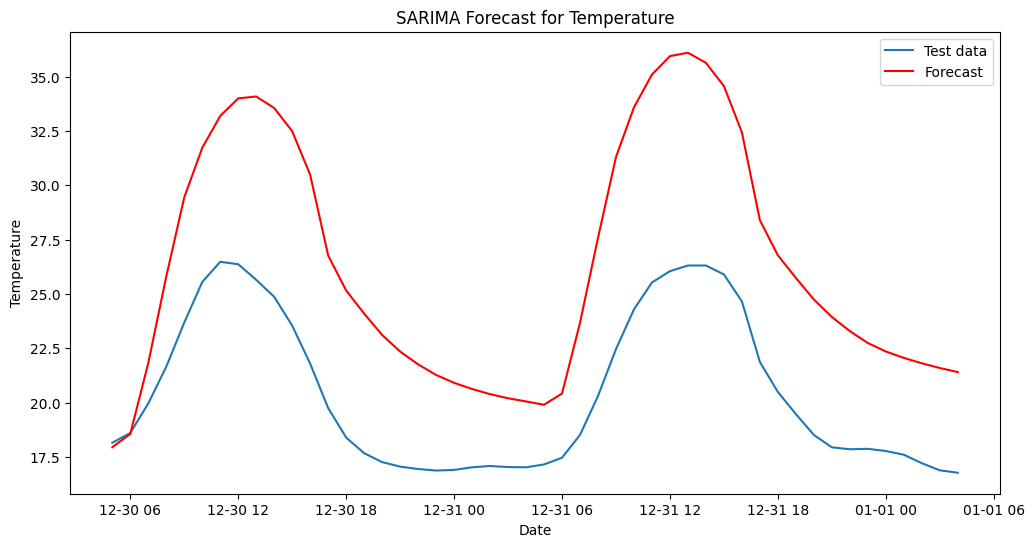

Root Mean Squared Error (RMSE): 6.32967875085509
training now:  9


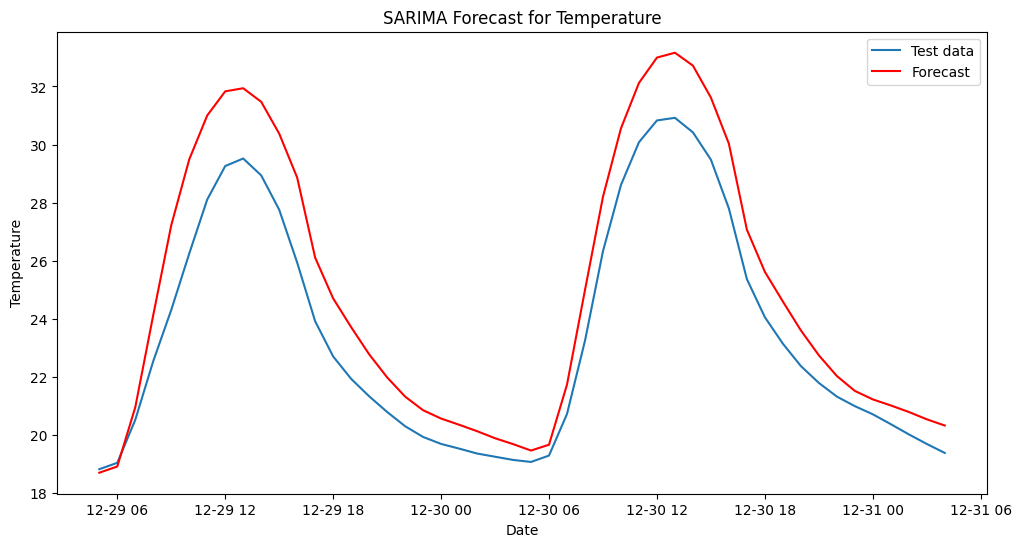

Root Mean Squared Error (RMSE): 1.6968297537784376
training now:  10


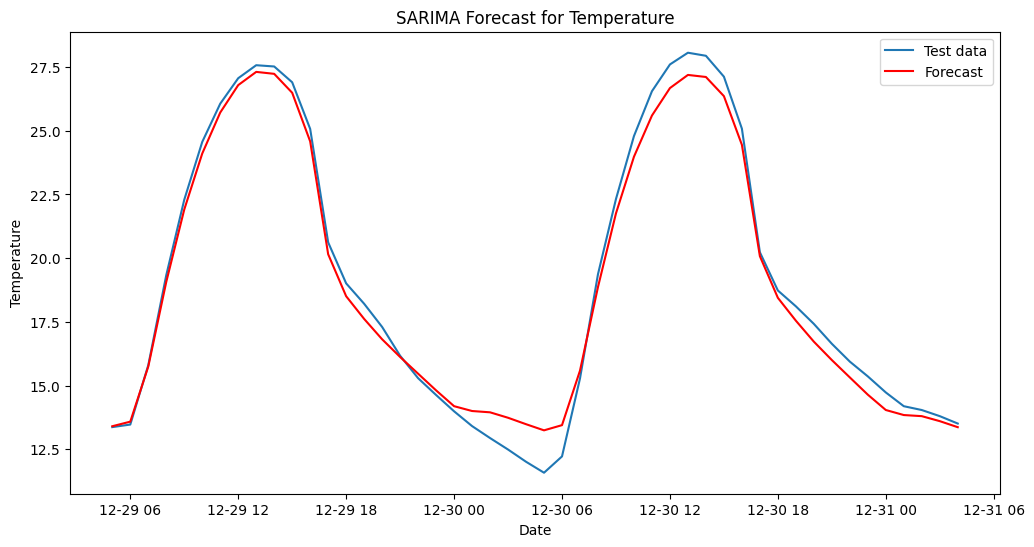

Root Mean Squared Error (RMSE): 0.6484927304320453
training now:  11


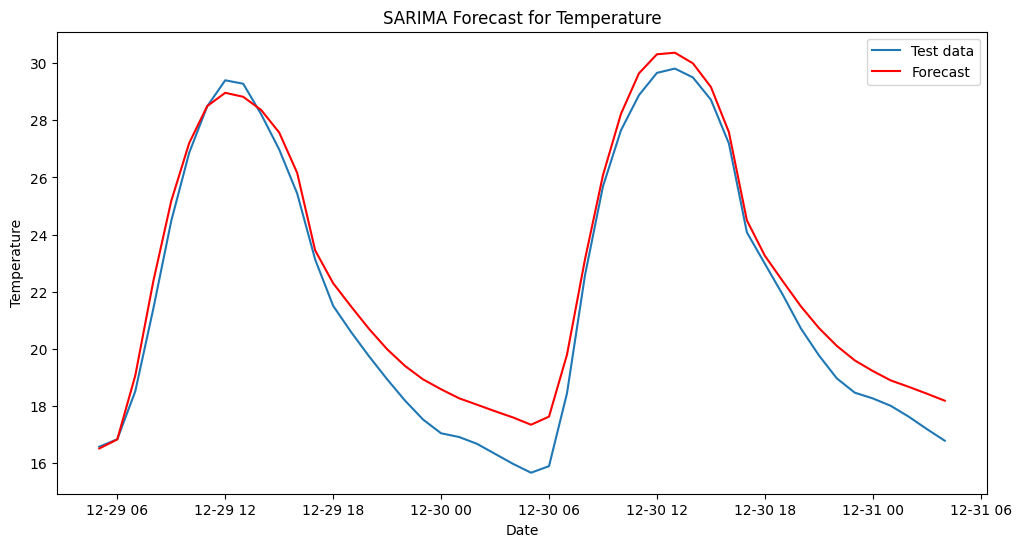

Root Mean Squared Error (RMSE): 0.9384102121491472
training now:  12


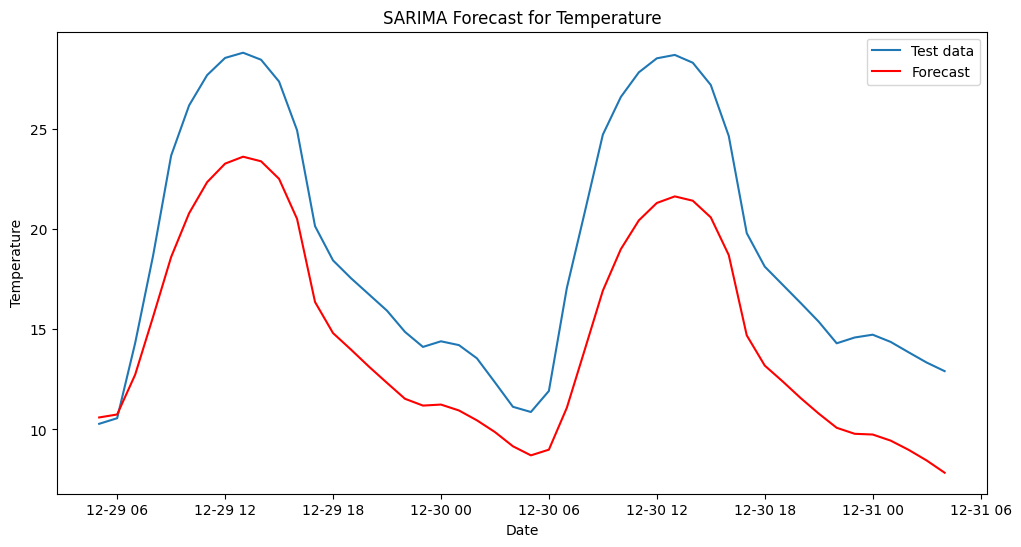

Root Mean Squared Error (RMSE): 4.838964072162534
training now:  13


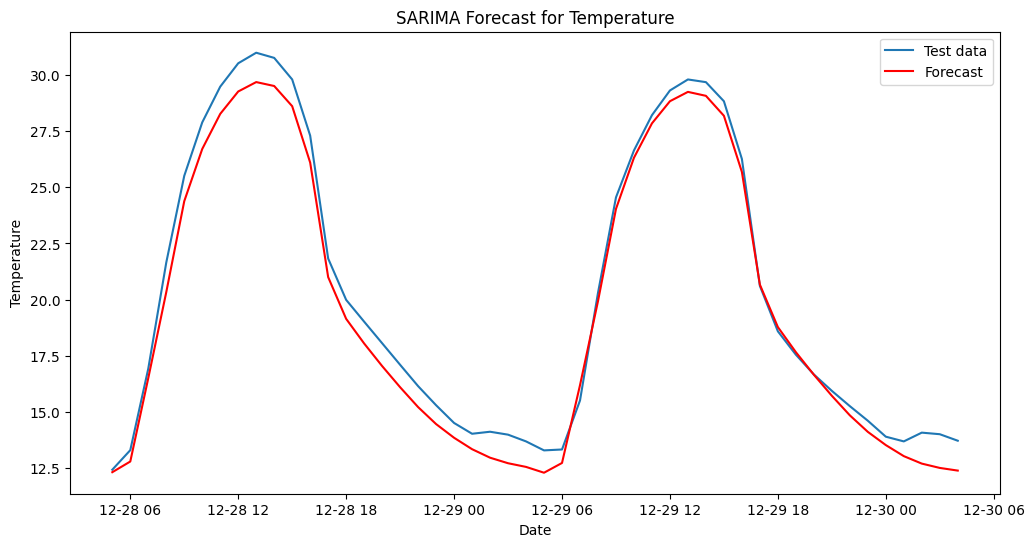

Root Mean Squared Error (RMSE): 0.8688126212650464
training now:  14


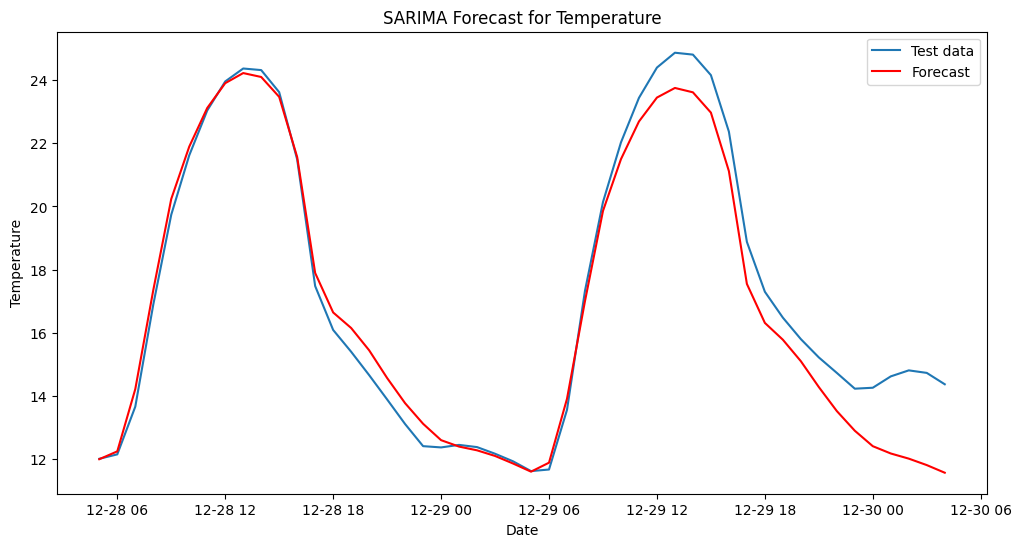

Root Mean Squared Error (RMSE): 1.0533311823139886
training now:  15


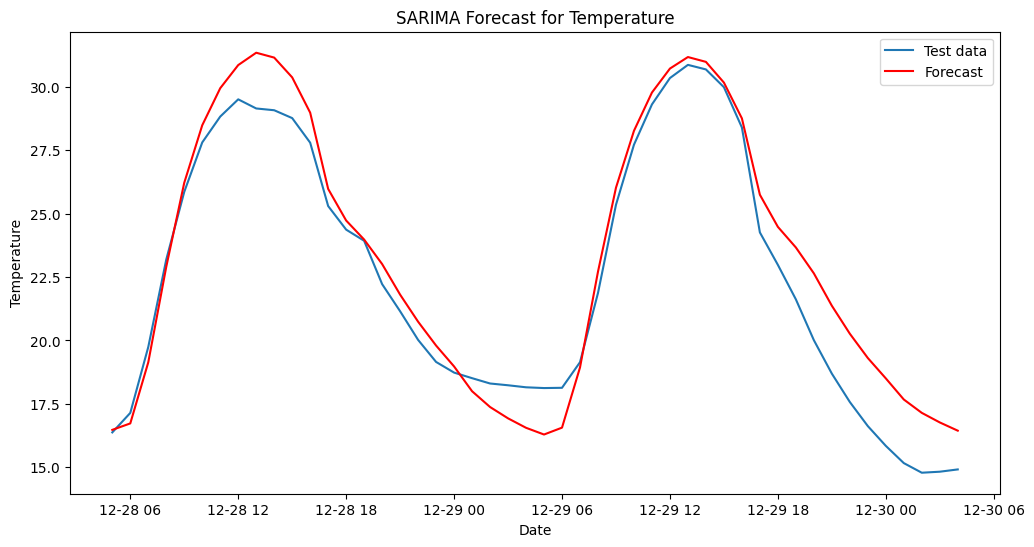

Root Mean Squared Error (RMSE): 1.412745982932369
training now:  16


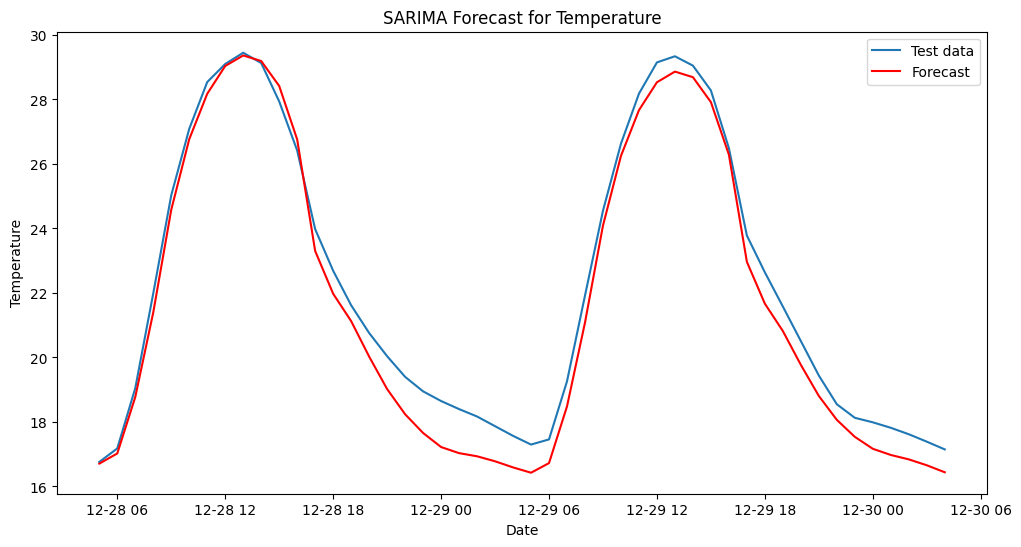

Root Mean Squared Error (RMSE): 0.7286461278238663
training now:  17


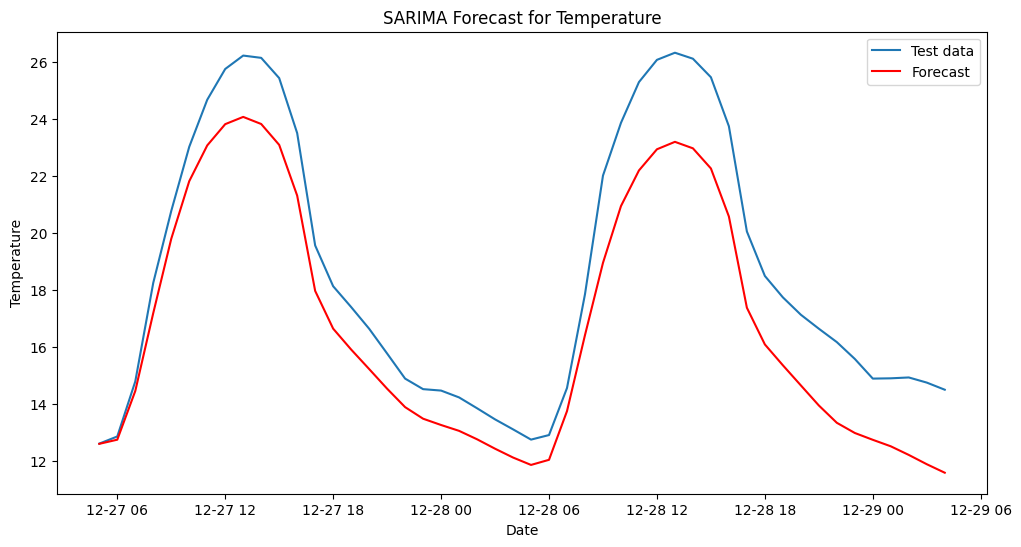

Root Mean Squared Error (RMSE): 2.098934561405594
training now:  18


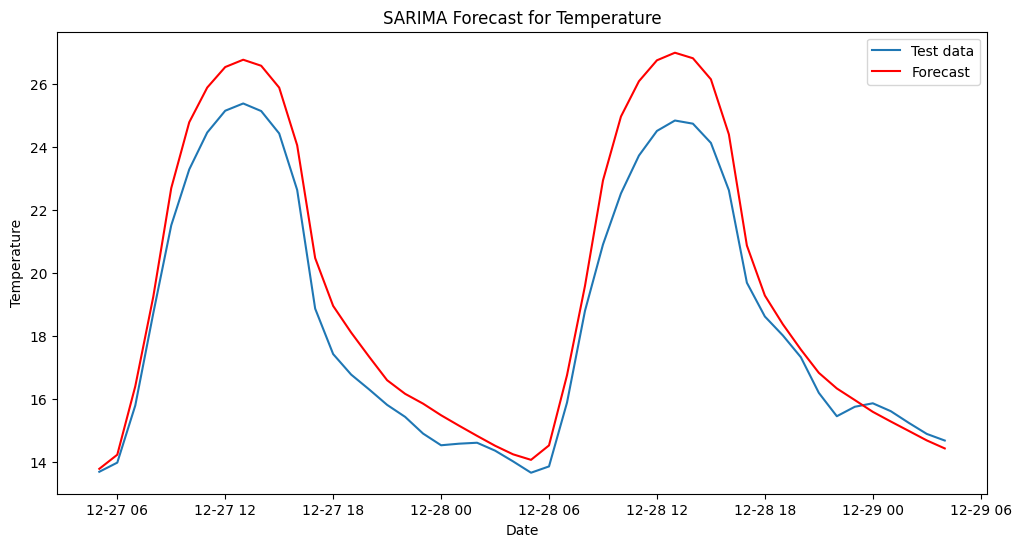

Root Mean Squared Error (RMSE): 1.2060155992523807
training now:  19


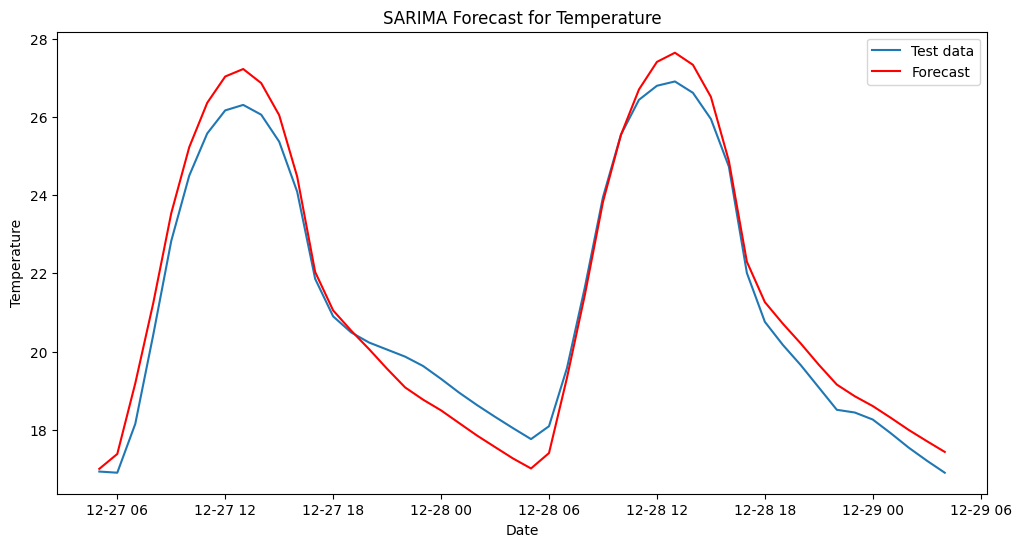

Root Mean Squared Error (RMSE): 0.596649041757519
training now:  20


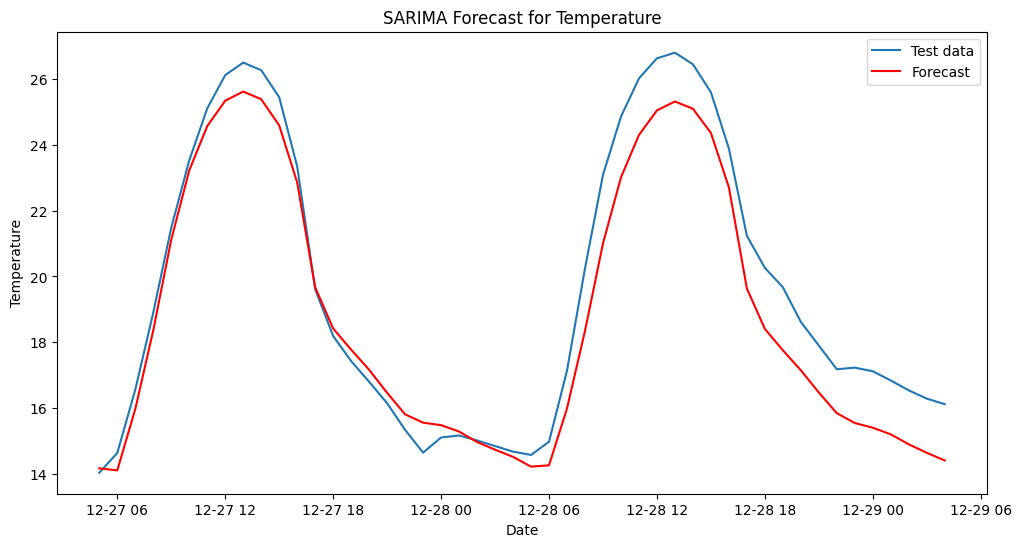

Root Mean Squared Error (RMSE): 1.1568844552862236


In [30]:
for i in range(2, 21):
    #check2=train_data[table[i-2]:table[i-1]]
    #test2=train_data[table[i-1]:table[i-1]+48] #2 days = 48 hours
    # Splitting data into train and test sets
    train_data = data[table[i-2]:table[i-1]]  # 1 year data
    test_data = data[table[i-1]:table[i-1]+48]   # Use the last 48 hours for testing
    print("training now: ", i)
    #training
    bengaluru_result=bengaluru_result.extend(train_data["TEMP"])
    #forecasting
    forecast2 = bengaluru_result.get_forecast(steps=48)
    # Plot the predicted values along with the actual values
    plt.figure(figsize=(12, 6))
    plt.plot(test_data.index, test_data["TEMP"], label='Test data')
    plt.plot(forecast2.predicted_mean, label='Forecast', color='red')
    plt.title('SARIMA Forecast for Temperature')
    plt.xlabel('Date')
    plt.ylabel('Temperature')
    plt.legend()
    plt.show()
    #RMSE
    rmse = np.sqrt(mean_squared_error(test_data["TEMP"], forecast2.predicted_mean))
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    # to store RMSE for every year
    rmse_record[i] = rmse

In [31]:
rmse_record

{1: 1.1944454864495697,
 2: 0.7109212744375722,
 3: 2.505106744713138,
 4: 0.4294606143411198,
 5: 1.3936402694133538,
 6: 2.6860261677668547,
 7: 0.54259205101153,
 8: 6.32967875085509,
 9: 1.6968297537784376,
 10: 0.6484927304320453,
 11: 0.9384102121491472,
 12: 4.838964072162534,
 13: 0.8688126212650464,
 14: 1.0533311823139886,
 15: 1.412745982932369,
 16: 0.7286461278238663,
 17: 2.098934561405594,
 18: 1.2060155992523807,
 19: 0.596649041757519,
 20: 1.1568844552862236}

In [32]:
forecast2.predicted_mean

2023-12-27 05:00:00    14.172721
2023-12-27 06:00:00    14.112033
2023-12-27 07:00:00    15.970096
2023-12-27 08:00:00    18.362034
2023-12-27 09:00:00    21.116197
2023-12-27 10:00:00    23.214545
2023-12-27 11:00:00    24.560728
2023-12-27 12:00:00    25.332725
2023-12-27 13:00:00    25.611481
2023-12-27 14:00:00    25.378200
2023-12-27 15:00:00    24.585205
2023-12-27 16:00:00    22.851977
2023-12-27 17:00:00    19.666767
2023-12-27 18:00:00    18.419258
2023-12-27 19:00:00    17.775886
2023-12-27 20:00:00    17.165066
2023-12-27 21:00:00    16.465702
2023-12-27 22:00:00    15.811836
2023-12-27 23:00:00    15.559569
2023-12-28 00:00:00    15.483769
2023-12-28 01:00:00    15.290843
2023-12-28 02:00:00    14.971857
2023-12-28 03:00:00    14.739724
2023-12-28 04:00:00    14.521213
2023-12-28 05:00:00    14.224440
2023-12-28 06:00:00    14.264837
2023-12-28 07:00:00    15.991323
2023-12-28 08:00:00    18.344301
2023-12-28 09:00:00    21.000232
2023-12-28 10:00:00    23.004638
2023-12-28

In [33]:
train_data=data[175200:]

In [34]:
bengaluru_result=bengaluru_result.extend(train_data["TEMP"])
forecast2 = bengaluru_result.get_forecast(steps=48)


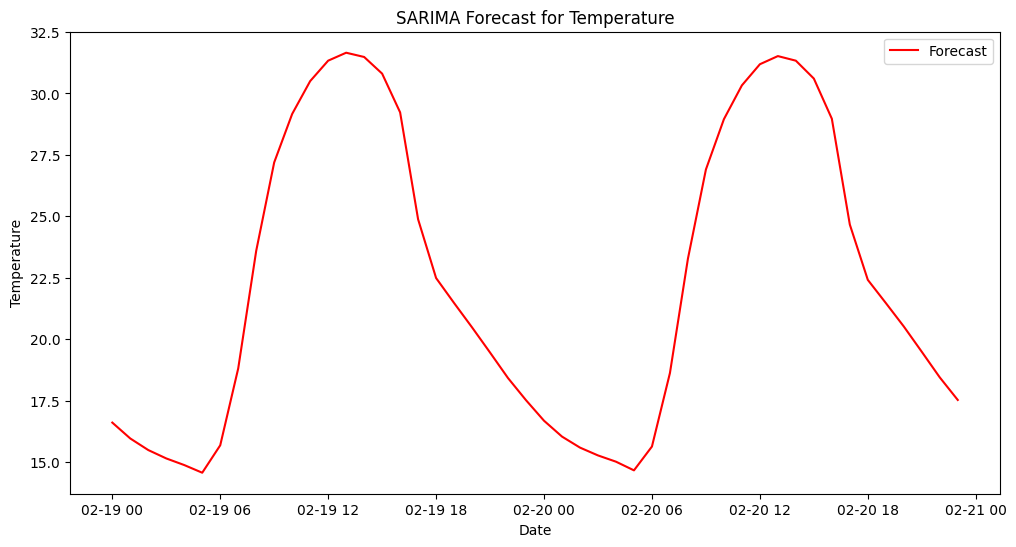

In [35]:
# Plot the predicted values along with the actual values
plt.figure(figsize=(12, 6))
#plt.plot(test_data.index, test_data["TEMP"], label='Test data')
plt.plot(forecast2.predicted_mean, label='Forecast', color='red')
plt.title('SARIMA Forecast for Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [36]:
#saving pickle file of model
with open("/kaggle/working/bengaluru_model.pkl", 'wb') as f:
    pickle.dump(bengaluru_result, f)

In [37]:
forecast2.predicted_mean

2024-02-19 00:00:00    16.608623
2024-02-19 01:00:00    15.961967
2024-02-19 02:00:00    15.491418
2024-02-19 03:00:00    15.150541
2024-02-19 04:00:00    14.881197
2024-02-19 05:00:00    14.569362
2024-02-19 06:00:00    15.684843
2024-02-19 07:00:00    18.811641
2024-02-19 08:00:00    23.596284
2024-02-19 09:00:00    27.192074
2024-02-19 10:00:00    29.164831
2024-02-19 11:00:00    30.499987
2024-02-19 12:00:00    31.331711
2024-02-19 13:00:00    31.654704
2024-02-19 14:00:00    31.481713
2024-02-19 15:00:00    30.804471
2024-02-19 16:00:00    29.228535
2024-02-19 17:00:00    24.877678
2024-02-19 18:00:00    22.489128
2024-02-19 19:00:00    21.472902
2024-02-19 20:00:00    20.480812
2024-02-19 21:00:00    19.457515
2024-02-19 22:00:00    18.418225
2024-02-19 23:00:00    17.518639
2024-02-20 00:00:00    16.684147
2024-02-20 01:00:00    16.039221
2024-02-20 02:00:00    15.590894
2024-02-20 03:00:00    15.272850
2024-02-20 04:00:00    15.018333
2024-02-20 05:00:00    14.665574
2024-02-20